# ARIMA Model with Python

# Dataset
**Minimum Daily Temperatures Dataset**

Use the following dataset that describes the minimum daily temperatures over 10 years (1981-1990) in the city of Melbourne, Australia. The source of the data is credited as the Australian Bureau of Meteorology.
The units are in degrees Celsius and there are 3,650 observations.

Download the dataset here:  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

**Load the dataset and create a line plot of the time series**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
# Supprimer les avertissements spécifiques
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url, header=0, index_col=0)


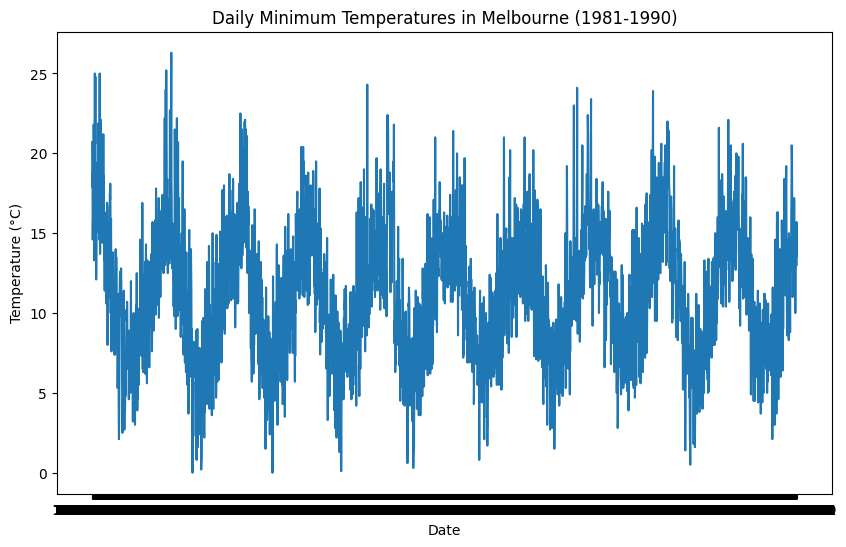

In [2]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Daily Minimum Temperatures in Melbourne (1981-1990)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

In [3]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("La série est stationnaire")
    else:
        print("La série n’est pas stationnaire")

# Appliquer le test ADF
check_stationarity(data['Temp'])

ADF Statistic: -4.4448049246117
p-value: 0.0002470826300360994
Critical Values:
   1%: -3.4321532327220154
   5%: -2.862336767636517
   10%: -2.56719413172842
La série est stationnaire


In [4]:
d = 0
while True:
    result = adfuller(data['Temp'].diff().dropna())
    if result[1] <= 0.05:
        d += 1
        print(f"La série est stationnaire après la différenciation d = {d}")
        break
    else:
        d += 1
        data['Temp'] = data['Temp'].diff().dropna()


La série est stationnaire après la différenciation d = 1


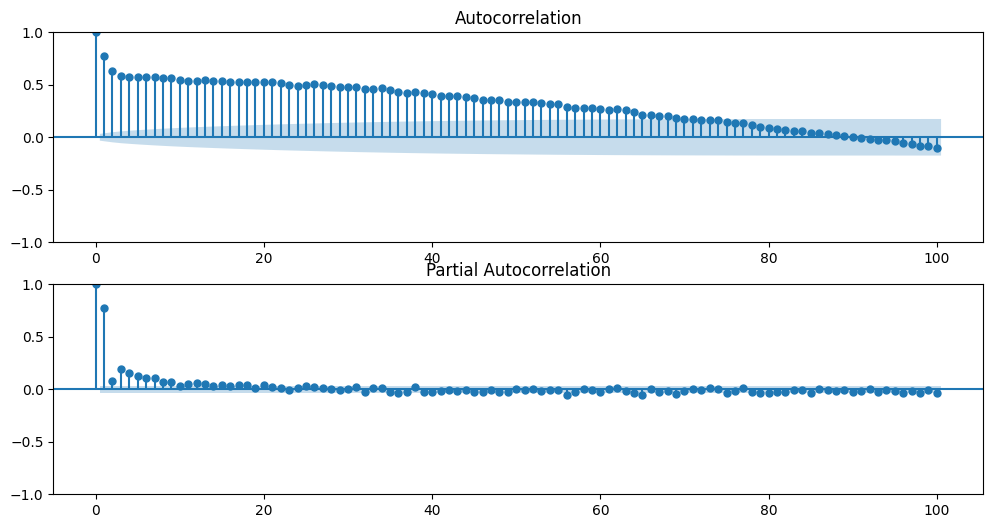

In [6]:
# Plot ACF and PACF to determine p and q
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(data['Temp'].dropna(), ax=plt.gca(), lags=100)
plt.subplot(212)
plot_pacf(data['Temp'].dropna(), ax=plt.gca(), lags=100)
plt.show()


# Split the dataset

Split the dataset into 2 subsets. The first part will be the training dataset that you will use to build an ARIMA model. The second part is the test dataset. It is these time steps that you will treat as out-of-sample.

Write the code to load the dataset, split it into the training and validation datasets, and save them to files *dataset.csv* and *validation.csv* respectively.


**Instructions**

The dataset contains data from January 1st 1981 to December 31st 1990.
Hold back the last 7 days of the dataset from December 1990 as the test dataset and treat those time steps as out of sample.

Specifically 1990-12-25 to 1990-12-31

In [102]:
# Diviser le dataset en train et test sets
train_size = int(len(data) * 0.7)
test_size = len(data) - train_size
train, test = data[0:train_size], data[train_size:len(data)]

# Sauvegarder les fichiers
train.to_csv('data/dataset.csv')
test.to_csv('data/validation.csv')
len(train), len(test)

(2555, 1095)

In [7]:
train = data.loc['1981-01-01':'1990-12-24']
test = data.loc['1990-12-25':'1990-12-31']

print("Première date de l'ensemble d'entraînement :", train.index[0])
print("Dernière date de l'ensemble d'entraînement :", train.index[-1])
print("Nombre d'observations dans l'ensemble d'entraînement :", len(train))
print("===========================================================")
print("Première date de l'ensemble de test :", test.index[0])
print("Dernière date de l'ensemble de test :", test.index[-1])
print("Nombre d'observations dans l'ensemble de test :", len(test))

Première date de l'ensemble d'entraînement : 1981-01-01
Dernière date de l'ensemble d'entraînement : 1990-12-24
Nombre d'observations dans l'ensemble d'entraînement : 3643
Première date de l'ensemble de test : 1990-12-25
Dernière date de l'ensemble de test : 1990-12-31
Nombre d'observations dans l'ensemble de test : 7


In [8]:
train.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


# Build the model
Check if the data is stationary. If it is not, make it stationary and develop a simple ARIMA model.

In [9]:
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3643
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8400.039
Date:                Tue, 11 Mar 2025   AIC                          16806.079
Time:                        06:02:21   BIC                          16824.680
Sample:                             0   HQIC                         16812.704
                               - 3643                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4634      0.017     26.518      0.000       0.429       0.498
ma.L1         -0.9204      0.008   -110.915      0.000      -0.937      -0.904
sigma2         5.8985      0.129     45.689      0.0

# One-step out-of-sample forecast
A one-step forecast is a forecast of the very next time step in the sequence from the available data used to fit the model.

In this case, we are interested in a one-step forecast of Christmas Day 1990: 1990-12-25

**Instructions**
The statsmodel `ARIMAResults` object provides a `forecast()` function for making predictions.

By default, this function makes a single step out-of-sample forecast. As such, you can call it directly and make your forecast. The result of the `forecast()` function is an array containing the forecast value, the standard error of the forecast, and the confidence interval information. You are only interested in the first element of this forecast.

**Expected result: **
`Forecast: 14.861669`

In [10]:
forecast = model_fit.forecast()
print(f"Forecast for 1990-12-25: {forecast.iloc[0]}")

Forecast for 1990-12-25: 11.837037894121615


In [12]:
# Evaluate the model on the test set
predictions = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, predictions)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 3.6768621973490023


In [13]:
actual_value = test.loc['1990-12-25', 'Temp']
forecast_error = forecast.iloc[0] - actual_value
print(f"Erreur de prévision : {forecast_error}")

Erreur de prévision : -1.5122841279267032


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prévision pour l’ensemble de test
predictions = model_fit.forecast(steps=len(test))

# Calcul du MSE et du MAE
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Erreur absolue moyenne (MAE) : {mae}")

Erreur quadratique moyenne (MSE) : 3.6768621973490023
Erreur absolue moyenne (MAE) : 1.705919663700221
